# Multichannel LDDMM with matching term masking - Mouse Brain

In [1]:
import sys
sys.path.insert(0,'../') # add code directory to path
# import lddmm
import torch_lddmm
# import numpy
import numpy as np
# import nibabel for i/o
import nibabel as nib
# import matplotlib for display
import matplotlib.pyplot as plt

In [2]:
# load mouse brain histology images
template_file_name = '../notebook/mouse_template.img'
target_file_name = '../notebook/mouse_target.img'
template_mask_file_name = '../notebook/mouse_template_mask.img'
target_mask_file_name = '../notebook/mouse_target_mask.img'
costmask_file_name = '../notebook/mouse_costmask.img' # does not have to be a binary image, but this example is binary

template_image_struct = nib.load(template_file_name)
target_image_struct = nib.load(target_file_name)
template_mask_image_struct = nib.load(template_mask_file_name)
target_mask_image_struct = nib.load(target_mask_file_name)
costmask_image_struct = nib.load(costmask_file_name)
dx = template_image_struct.header['pixdim'][1:4]

# load into numpy arrays
template_image = np.squeeze(template_image_struct.get_data()).astype(np.float32)
target_image = np.squeeze(target_image_struct.get_data()).astype(np.float32)
template_mask = np.squeeze(template_mask_image_struct.get_data()).astype(np.float32)
target_mask = np.squeeze(target_mask_image_struct.get_data()).astype(np.float32)
costmask_image = np.squeeze(costmask_image_struct.get_data()).astype(np.float32)


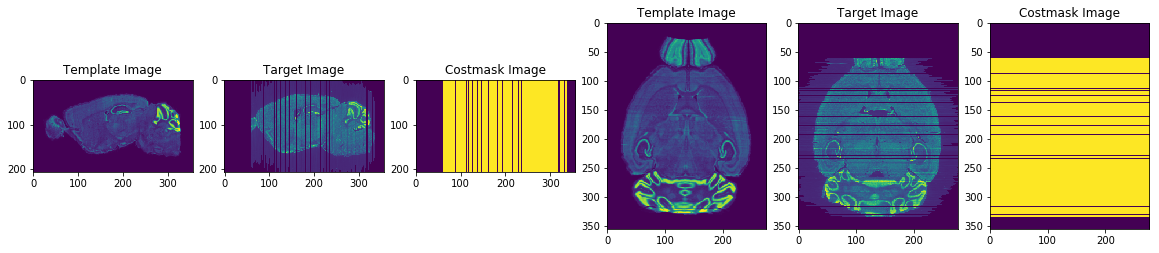

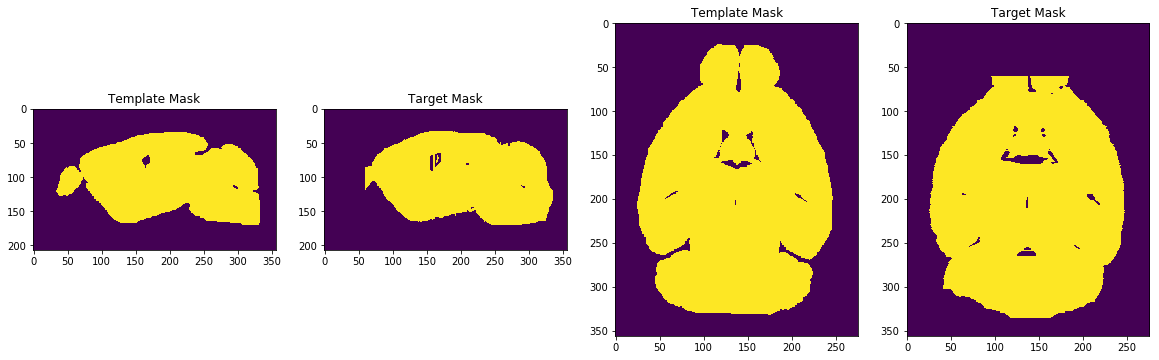

In [3]:
# display slices
plt.rcParams["figure.figsize"]=20,20
plt.figure()
plt.subplot(1,6,1)
plt.imshow(template_image[:,:,100])
plt.title('Template Image')
plt.subplot(1,6,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,6,3)
plt.imshow(costmask_image[:,:,100])
plt.title('Costmask Image')
plt.subplot(1,6,4)
plt.imshow(template_image[96,:,:])
plt.title('Template Image')
plt.subplot(1,6,5)
plt.imshow(target_image[96,:,:])
plt.title('Target Image')
plt.subplot(1,6,6)
plt.imshow(costmask_image[96,:,:])
plt.title('Costmask Image')
plt.figure()
plt.subplot(1,4,1)
plt.imshow(template_mask[:,:,100])
plt.title('Template Mask')
plt.subplot(1,4,2)
plt.imshow(target_mask[:,:,100])
plt.title('Target Mask')
plt.subplot(1,4,3)
plt.imshow(template_mask[96,:,:])
plt.title('Template Mask')
plt.subplot(1,4,4)
plt.imshow(target_mask[96,:,:])
plt.title('Target Mask')
plt.show()

## Run registration

In [4]:
# create LDDMM object
# here, we input the template and target arguments as lists of numpy arrays, one for each channel
# we also input the costmask variable as a numpy array, which is a matrix of weights on the matching term
lddmm = torch_lddmm.LDDMM(template=[template_image,template_mask],target=[target_image,target_mask],costmask=costmask_image,outdir='../notebook/',do_affine=0,do_lddmm=1,a=8,niter=150,epsilon=4e-3,sigma=[20.0,0.35],sigmaR=1.5,optimizer='gdr',dx=dx)


Current parameters:
>    a               = 8 (smoothing kernel, a*(pixel_size))
>    p               = 2 (smoothing kernel power, p*2)
>    niter           = 150 (number of iterations)
>    epsilon         = 0.004 (gradient descent step size)
>    epsilonL        = 1e-07 (gradient descent step size, affine)
>    epsilonT        = 2e-05 (gradient descent step size, translation)
>    minbeta         = 0.0001 (smallest multiple of epsilon)
>    sigma           = [20.0, 0.35] (matching term coefficient (0.5/sigma**2))
>    sigmaR          = 1.5 (regularization term coefficient (0.5/sigmaR**2))
>    nt              = 5 (number of time steps in velocity field)
>    do_lddmm        = 1 (perform LDDMM step, 0 = no, 1 = yes)
>    do_affine       = 0 (interleave linear registration: 0 = no, 1 = affine, 2 = rigid)
>    checkaffinestep = 0 (evaluate linear matching energy: 0 = no, 1 = yes)
>    im_norm_ms      = 0 (normalize image by mean and std: 0 = no, 1 = yes)
>    gpu_number      = 0 (index 

In [5]:
# run computation
lddmm.run()
lddmm.setParams('a',5)
lddmm.setParams('niter',100)
lddmm.run()

iter: 0, E = 1028.0652, ER = 0.0000, EM = 1028.0652, epd = 0.004000.
iter: 1, E= 971.446, ER= 0.023, EM= 971.423, epd= 0.004, time= 1.70s.
iter: 2, E= 945.112, ER= 0.083, EM= 945.029, epd= 0.004, time= 1.83s.
iter: 3, E= 922.841, ER= 0.174, EM= 922.667, epd= 0.004, time= 1.82s.
iter: 4, E= 903.723, ER= 0.291, EM= 903.431, epd= 0.004, time= 1.83s.
iter: 5, E= 886.280, ER= 0.430, EM= 885.849, epd= 0.004, time= 1.83s.
iter: 6, E= 871.049, ER= 0.586, EM= 870.463, epd= 0.004, time= 1.82s.
iter: 7, E= 858.193, ER= 0.752, EM= 857.441, epd= 0.004, time= 1.83s.
iter: 8, E= 845.850, ER= 0.925, EM= 844.924, epd= 0.004, time= 1.83s.
iter: 9, E= 835.249, ER= 1.104, EM= 834.145, epd= 0.004, time= 1.82s.
iter: 10, E= 825.720, ER= 1.285, EM= 824.435, epd= 0.004, time= 1.83s.
iter: 11, E= 817.083, ER= 1.467, EM= 815.616, epd= 0.004, time= 1.83s.
iter: 12, E= 809.319, ER= 1.649, EM= 807.670, epd= 0.004, time= 1.82s.
iter: 13, E= 802.307, ER= 1.831, EM= 800.476, epd= 0.004, time= 1.83s.
iter: 14, E= 795.

iter: 25, E= 649.112, ER= 6.139, EM= 642.973, epd= 0.000, time= 1.81s.
iter: 26, E= 649.089, ER= 6.142, EM= 642.947, epd= 0.000, time= 1.81s.
iter: 27, E= 649.072, ER= 6.144, EM= 642.929, epd= 0.000, time= 1.81s.
iter: 28, E= 649.061, ER= 6.145, EM= 642.916, epd= 0.000, time= 1.81s.
iter: 29, E= 649.053, ER= 6.146, EM= 642.907, epd= 0.000, time= 1.81s.
iter: 30, E= 649.047, ER= 6.146, EM= 642.901, epd= 0.000, time= 1.81s.
iter: 31, E= 649.043, ER= 6.147, EM= 642.896, epd= 0.000, time= 1.81s.
iter: 32, E= 649.041, ER= 6.147, EM= 642.893, epd= 0.000, time= 1.81s.
iter: 33, E= 649.039, ER= 6.147, EM= 642.891, epd= 0.000, time= 1.81s.
iter: 34, E= 649.037, ER= 6.148, EM= 642.890, epd= 0.000, time= 1.81s.
iter: 35, E= 649.036, ER= 6.148, EM= 642.889, epd= 0.000, time= 1.81s.
iter: 36, E= 649.036, ER= 6.148, EM= 642.888, epd= 0.000, time= 1.81s.
iter: 37, E= 649.035, ER= 6.148, EM= 642.887, epd= 0.000, time= 1.81s.
iter: 38, E= 649.035, ER= 6.148, EM= 642.887, epd= 0.000, time= 1.81s.
iter: 

## Display result

In [6]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()

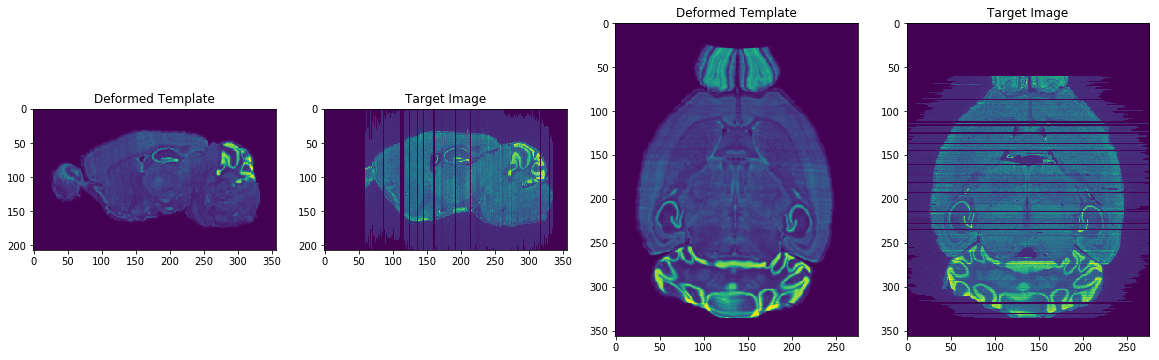

In [7]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[96,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[96,:,:])
plt.title('Target Image')
plt.show()

In [8]:
# load annotation
anno_file_name = '../notebook/mouse_template_annotation.img'
anno_image_struct = nib.load(anno_file_name)
anno_image = np.squeeze(anno_image_struct.get_data()).astype(np.float32)

# transform annotation based on current transform
deformed_anno,_,_,_ = lddmm.applyThisTransform(anno_image,interpmode='nearest')
deformed_anno = deformed_anno[-1].cpu().numpy()

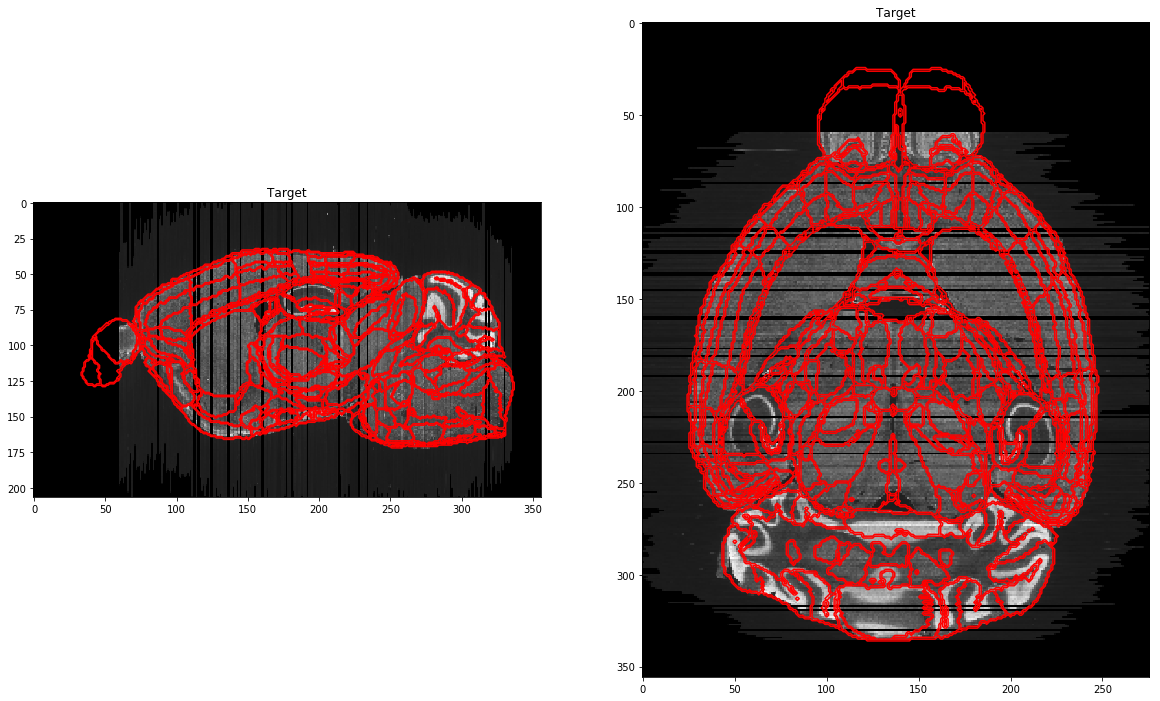

In [9]:
# draw deformed annotation on target
levels = np.unique(deformed_anno[:,:,100])
plt.figure()
plt.subplot(1,2,1)
plt.imshow(target_image[:,:,100],cmap='gray')
plt.title('Target')
for i in range(levels.shape[0]):
    plt.contour((deformed_anno[:,:,100]==levels[i])*1.0,0.999,colors='r')

levels = np.unique(deformed_anno[96,:,:])
plt.subplot(1,2,2)
plt.imshow(target_image[96,:,:],cmap='gray')
plt.title('Target')
for i in range(levels.shape[0]):
    plt.contour((deformed_anno[96,:,:]==levels[i])*1.0,0.999,colors='r')

plt.show()

In [16]:
# output transforms
(vt0,vt1,vt2) = lddmm.outputTransforms() # output LDDMM and linear transforms
(phi0,phi1,phi2) = lddmm.computeThisDisplacement() # output resultant displacement field
deformed_template = lddmm.outputDeformedTemplate() # output deformed template as numpy array

# clear memory (the LDDMM object still exists and consumes some GPU memory but transforms are deleted)
lddmm.delete()